In [108]:
# import the data 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/api/pyplot_summary.html

# === STEP 1: Load your data ===
# sample, group, oil_type, oil_conc
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df = pd.read_csv("oil_concentration.csv")
#  show the first few rows of data 
df.head()

,sample,group,oil_type,oil_conc
0,1,Control,A,0.011
1,1,Control,B,0.050
2,2,Control,B,0.011
3,2,Control,A,0.001
4,3,Treatment1,A,0.200


In [109]:
# set colors 
cb_colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442",
             "#0072B2", "#D55E00", "#CC79A7"]


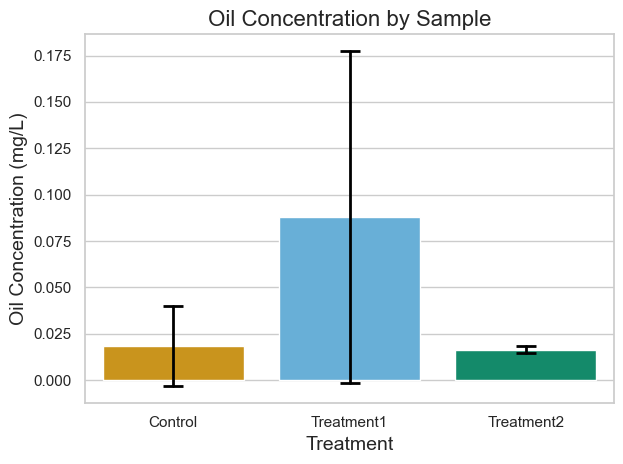

In [110]:
# === STEP 2: Set colorblind-friendly palette ===
sns.set_theme(style="whitegrid", palette=cb_colors)
# https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(
    data=df,
    x='group',
    y='oil_conc',
    hue='group',       # Optional: group by color
    dodge=False,        # All bars in one column per sample
    errorbar = 'sd',
    err_kws={
        'linewidth': 2,
        'marker': '_', 
        'markersize': 15,
        'markeredgewidth': 2,
        'linestyle': '-',
        'color': 'black', 
        'visible':True
    }
)

# === STEP 4: Customize plot ===
plt.title("Oil Concentration by Sample", fontsize=16)
plt.xlabel("Treatment", fontsize=14)
plt.ylabel("Oil Concentration (mg/L)", fontsize=14)
# plt.legend(title='Group')
plt.tight_layout()

# === STEP 5: Show or save ===
plt.savefig("oil_concentration_barplot.png", dpi=300)
plt.show()

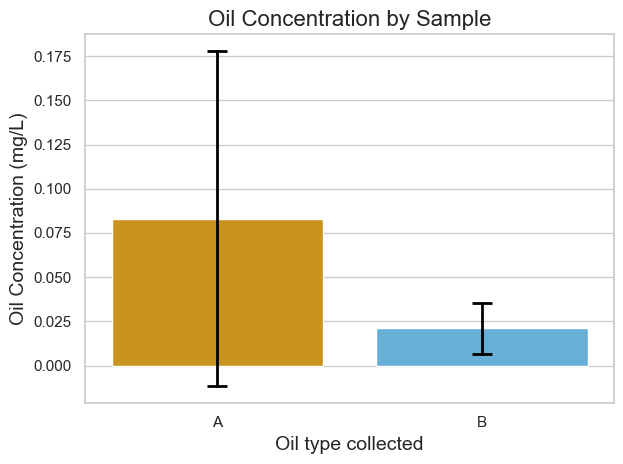

In [111]:
# === STEP 2: Set colorblind-friendly palette ===
sns.set_theme(style="whitegrid", palette=cb_colors)

# https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(
    data=df,
    x='oil_type',
    y='oil_conc',
    hue='oil_type',       # Optional: group by color
    dodge=False,        # All bars in one column per sample
    errorbar = 'sd',
    err_kws={
        'linewidth': 2,
        'marker': '_', 
        'markersize': 15,
        'markeredgewidth': 2,
        'linestyle': '-',
        'color': 'black', 
        'visible':True
    }
)

# === STEP 4: Customize plot ===
plt.title("Oil Concentration by Sample", fontsize=16)
plt.xlabel("Oil type collected", fontsize=14)
plt.ylabel("Oil Concentration (mg/L)", fontsize=14)
# plt.legend(title='Group')
plt.tight_layout()

# === STEP 5: Show or save ===
plt.savefig("figs/oil_concentration_barplot.png", dpi=300)
plt.show()

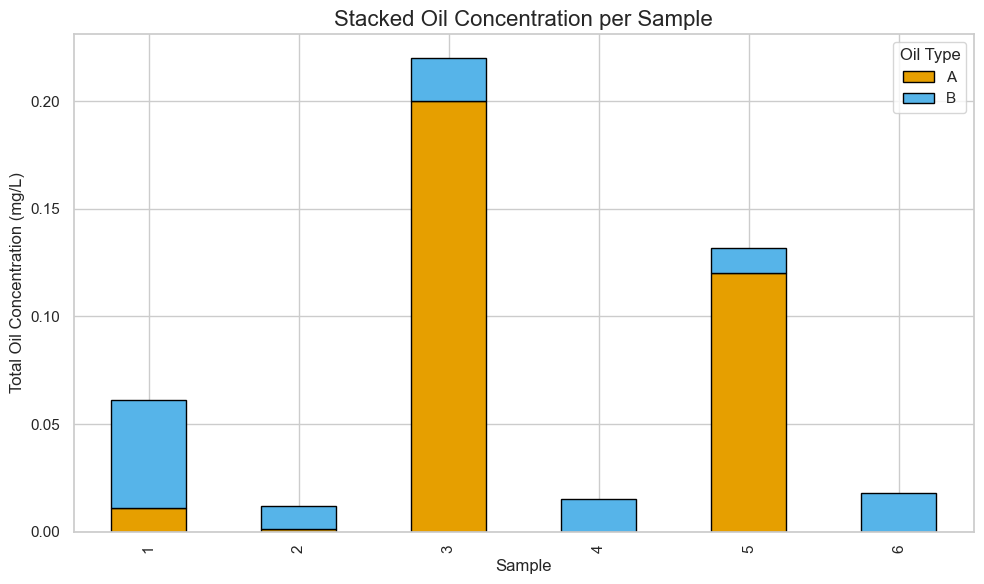

In [112]:
# === STEP 2: Pivot for stacking ===
df_pivot = df.pivot(index='sample', columns='oil_type', values='oil_conc').fillna(0)

# === STEP 3: Set colorblind-friendly palette ===
colorblind_palette = sns.color_palette(cb_colors, n_colors=len(df_pivot.columns))

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
# === STEP 4: Plot stacked bar chart ===
df_pivot.plot(
    kind='bar',
    stacked=True,
    color=colorblind_palette,
    figsize=(10, 6),
    edgecolor='black'
)

# === STEP 5: Customize plot ===
plt.title("Stacked Oil Concentration per Sample", fontsize=16)
plt.xlabel("Sample")
plt.ylabel("Total Oil Concentration (mg/L)")
plt.legend(title="Oil Type")
plt.tight_layout()

# === STEP 6: Show or save ===
plt.savefig("figs/stacked_oil_bars.png", dpi=300)
plt.show()


[np.float64(-0.2), np.float64(0.8), np.float64(0.20000000000000007), np.float64(1.2000000000000002), np.float64(2.2), 0.0, 0.0]


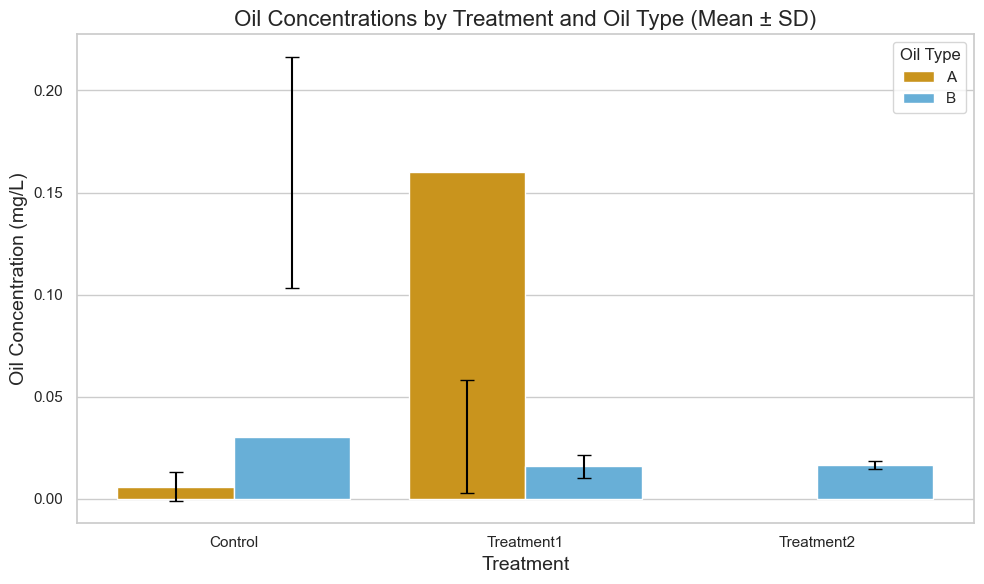

In [113]:
# === STEP 2: Aggregate (mean and std) ===
summary = df.groupby(['group', 'oil_type']).agg(
    mean_conc=('oil_conc', 'mean'),
    std_conc=('oil_conc', 'std')
).reset_index()

# === STEP 3: Set colorblind-friendly palette ===
sns.set_theme(style="whitegrid", palette=cb_colors)

# === STEP 4: Create grouped bar plot with error bars ===
plt.figure(figsize=(10, 6))

# Use seaborn's barplot grouped by Treatment and Oil_Type
sns.barplot(
    data=summary,
    x='group',
    y='mean_conc',
    hue='oil_type',
    errorbar=None,  # We'll add manual error bars
    dodge=True
)

# Add manual error bars
# Get bar locations from the barplot
bar_positions = []
group_offsets = {}

ax = plt.gca()
for patch in ax.patches:
    bar_positions.append(patch.get_x() + patch.get_width() / 2)
print(bar_positions)
# Since seaborn does not return bar positions, we build them based on group/hue combinations
unique_treatments = summary['group'].unique()
unique_oils = summary['oil_type'].unique()

n_oils = len(unique_oils)
group_width = 0.8
bar_width = group_width / n_oils

for i, (treatment, oil) in enumerate(zip(summary['group'], summary['oil_type'])):
    idx_t = list(unique_treatments).index(treatment)
    idx_o = list(unique_oils).index(oil)
    center = bar_positions[i]
    err = summary.loc[(summary['group'] == treatment) & (summary['oil_type'] == oil), 'std_conc'].values[0]
    height = summary.loc[(summary['group'] == treatment) & (summary['oil_type'] == oil), 'mean_conc'].values[0]
    plt.errorbar(
        x=center,
        y=height,
        yerr=err,
        fmt='none',
        capsize=5,
        color='black',
        linewidth=1.5
    )

# === STEP 5: Customize plot ===
plt.title("Oil Concentrations by Treatment and Oil Type (Mean ± SD)", fontsize=16)
plt.ylabel("Oil Concentration (mg/L)", fontsize=14)
plt.xlabel("Treatment", fontsize=14)
plt.legend(title="Oil Type")
plt.tight_layout()

# === STEP 6: Show or save ===
plt.savefig("figs/grouped_oil_concentrations_with_error_bars.png", dpi=300)
plt.show()
